In [64]:
import pandas as pd

# Assuming your dataset is in a CSV
df = pd.read_csv("final_data.csv")

# Create the target column
df['Needs_Treatment'] = ((df['Stress_Level'] > 3) | 
                         (df['Depression_Score'] > 3) | 
                         (df['Anxiety_Score'] > 3)).astype(int)


In [65]:
X = df.drop(columns=['Needs_Treatment', 'Stress_Level', 'Depression_Score', 'Anxiety_Score'])
y = df['Needs_Treatment']


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with class weighting
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [67]:
import numpy as np

# Get predicted probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Adjust threshold
threshold = 0.5398  # try lower threshold to increase recall
y_pred = (y_probs >= threshold).astype(int)  # example

# Evaluation
from sklearn.metrics import recall_score
print(recall_score(y_test , y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_probs))


0.7667057444314185
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       549
           1       0.77      0.77      0.77       853

    accuracy                           0.72      1402
   macro avg       0.70      0.70      0.70      1402
weighted avg       0.72      0.72      0.72      1402

ROC AUC: 0.7530498807380787


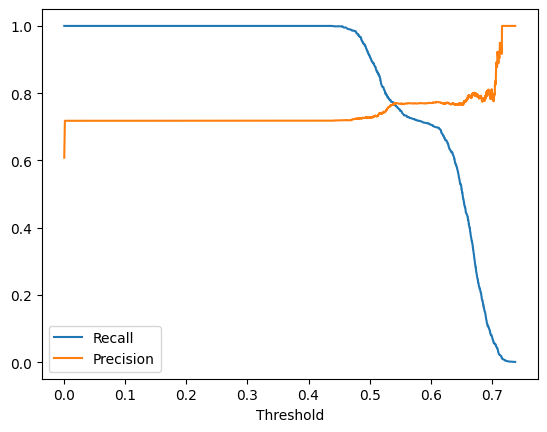

In [68]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()


Intersection at threshold = 0.5398
Precision = Recall = 0.7691


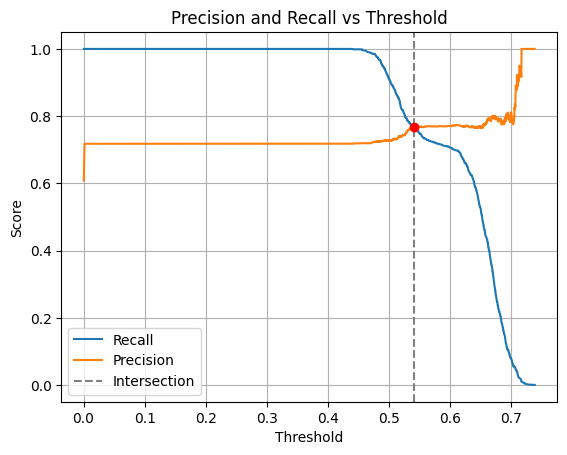

In [69]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Precision and recall arrays are one element longer than thresholds
# So we trim them to match the thresholds
precisions = precisions[:-1]
recalls = recalls[:-1]

# Find where precision and recall intersect
# Compute the absolute difference
diff = np.abs(precisions - recalls)

# Find the index of the minimum difference (closest intersection)
intersection_idx = np.argmin(diff)

# Get the intersection values
intersection_threshold = thresholds[intersection_idx]
intersection_precision = precisions[intersection_idx]
intersection_recall = recalls[intersection_idx]

print(f"Intersection at threshold = {intersection_threshold:.4f}")
print(f"Precision = Recall = {intersection_precision:.4f}")

# Plot
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.axvline(intersection_threshold, color='gray', linestyle='--', label='Intersection')
plt.scatter(intersection_threshold, intersection_precision, color='red', zorder=5)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision and Recall vs Threshold')
plt.grid(True)
plt.show()
